## Compulsory Task

In [151]:
# Importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Loading the Data

In [152]:
# Reading data from 'Iris.csv' file and storing into a dataframe.
df = pd.read_csv('Iris.csv', encoding='unicode_escape')

# Displaying first 5 rows of dataframe.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting the Data

<AxesSubplot: >

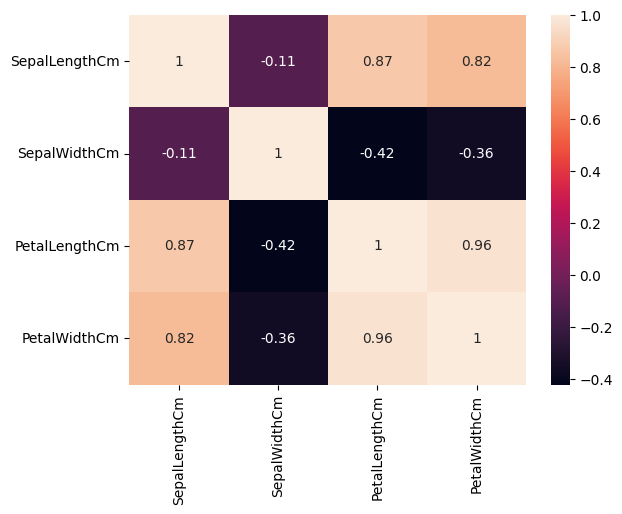

In [153]:
# Dropping 'Id' & 'Species' columns.
df.drop(['Id','Species'], axis=1, inplace=True)

# Creating a heatmap of all features and showing the correlations between them.
sns.heatmap(df.corr(), annot=True)

There is a high correlation between:
* Sepal Length & Petal Width
* Sepal Length & Petal Length
* Petal Length & Petal Width

This is redundancy in the data which needs to be removed.

### Applying PCA

In [154]:
# Storing features into variable 'X'.
X = df.values

# Scaling the data using standard scaler.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to features to reduce them to just 3 features.
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

<AxesSubplot: >

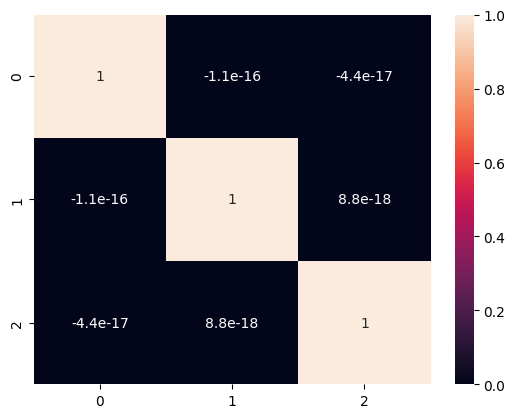

In [155]:
# Storing PCA values into a dataframe.
pca_df = pd.DataFrame(X_pca, index=df.index)

# Plotting a heatmap of the transformed data.
sns.heatmap(pca_df.corr(), annot=True)

Compared to the previous heatmap, it is clear that there is almost no correlation between principle components. 

This has removed the redundancy in the data previously mentioned. 

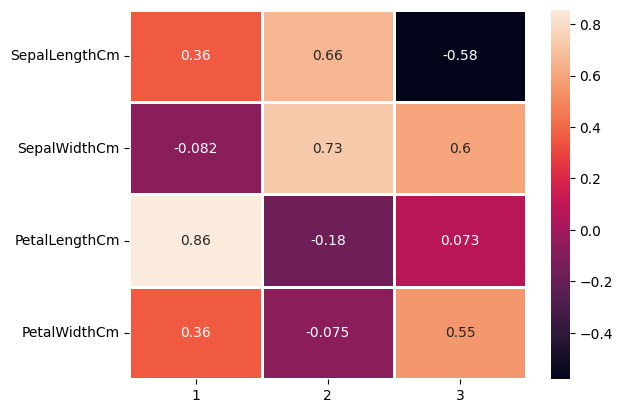

In [159]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1,4)).transpose()
ax = sns.heatmap(components,linewidth=1, annot=True)
plt.show()